<center><h1> Covid-19 Vaccination Analysis using Python</h1></center>

<center><img src="https://www.jhsph.edu/sebin/z/z/SARS-CoV-2-vaccine-820x440.jpg" width=600></img></center>  <br>

To fight against COVID-19 many companies have manufactured different vaccines
and these vaccines are used by different countries.

This is a small analysis of COVID-19 vaccines.

Here, I am using Kaggle dataset containing the following data:

* **Country**- this is the country for which the vaccination information is provided;
* **Country ISO Code** - ISO code for the country;
* **Date** - date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;
* **Total number of vaccinations** - this is the absolute number of total immunizations in the country;
* **Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;
* **Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;
* **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;
* **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;
* **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;
* **Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;
* **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;
* **Number of vaccinations per day** - number of daily vaccination for that day and country;
* **Daily vaccinations per million** - ratio (in ppm) between vaccination number and total population for the current date in the country;
* **Vaccines used in the country** - total number of vaccines used in the country (up to date);
* **Source name** - source of the information (national authority, international organization, local organization etc.);
* **Source website** - website of the source of information.



#### Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

#### Reading data from CSV file

In [5]:
data = pd.read_csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


#### Convert Date column to date type and fill Missing Value

In [6]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(0)
data = data[data.country.apply(lambda x: x not in ["England", "Scotland", "Wales", "Northern Ireland"])]
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [7]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.854700e+04,1.854700e+04,1.854700e+04,1.854700e+04,1.854700e+04,18547.000000,18547.000000,18547.000000,18547.000000
mean,3.435217e+06,1.857730e+06,7.798481e+05,7.178469e+04,7.963223e+04,9.562346,6.184738,2.639451,2961.176740
std,2.037345e+07,1.024912e+07,5.510988e+06,4.784457e+05,4.331893e+05,20.592239,12.841833,7.683950,4728.912937
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.145000e+02,0.000000,0.000000,0.000000,310.500000
50%,1.421800e+04,1.903000e+03,0.000000e+00,0.000000e+00,5.013000e+03,0.310000,0.030000,0.000000,1409.000000
75%,6.373385e+05,3.837295e+05,6.857850e+04,1.317250e+04,2.806550e+04,9.175000,5.960000,1.495000,3906.000000
max,4.495110e+08,1.591750e+08,1.254534e+08,1.505300e+07,1.360557e+07,223.150000,115.530000,107.620000,118759.000000


#### Number of people vaccinated in each country

In [8]:
data.country.value_counts()

Norway           168
Canada           157
China            156
Russia           156
Israel           152
                ... 
Benin              1
Turkmenistan       1
Tajikistan         1
Tuvalu             1
Guinea-Bissau      1
Name: country, Length: 207, dtype: int64

#### Number of vaccine combinations given

In [10]:
data.vaccines.value_counts()

Oxford/AstraZeneca                                                                    3406
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                         2520
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1490
Pfizer/BioNTech                                                                       1261
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1109
Moderna, Pfizer/BioNTech                                                              1010
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           950
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      832
Oxford/AstraZeneca, Sinopharm/Beijing                                                  809
Sputnik V                                                                              420
Oxford/AstraZeneca, Sinovac                                                            333

#### Making a list of all the different vaccines & its corresponding countries in which the specific vaccine is taken
Storing this data in a form of a dictionary & printing it

In [14]:
df = data[["vaccines", "country"]]
dict_ = {}
for i in df.vaccines.unique():
    dict_[i] = [df["country"][j] for j in df[df["vaccines"]==i].index]
vaccines = {}
for key, value in dict_.items():
    vaccines[key] = set(value)
for i, j in vaccines.items():
    #printing vaccines used in each country
    print(f"Vaccines: {i} \nCountries: {list(j)}\n")

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing 
Countries: ['Afghanistan', 'Peru', 'Maldives']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V 
Countries: ['Bosnia and Herzegovina', 'Philippines', 'Albania']

Vaccines: Sputnik V 
Countries: ['Guinea', 'Venezuela', 'Algeria', 'Belarus', 'Syria', 'Paraguay']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech 
Countries: ['South Korea', 'Cayman Islands', 'Costa Rica', 'Cape Verde', 'Jersey', 'Saudi Arabia', 'Slovenia', 'Andorra', 'Panama', 'Australia', 'Isle of Man', 'Oman', 'Sweden']

Vaccines: Oxford/AstraZeneca 
Countries: ['Lesotho', 'New Caledonia', 'Antigua and Barbuda', 'Togo', 'Uganda', 'French Polynesia', 'Wallis and Futuna', 'Bahamas', 'Jamaica', 'Barbados', 'Samoa', 'Eswatini', 'Tonga', 'South Sudan', 'Saint Helena', 'Democratic Republic of Congo', 'Falkland Islands', 'Solomon Islands', 'Botswana', 'Brunei', 'Saint Vincent and the Grenadines', 'Montserrat', 'Saint Lucia', 'Angola', 'Yemen', 'Ang

#### Visualizing the combination of vaccines used in each country

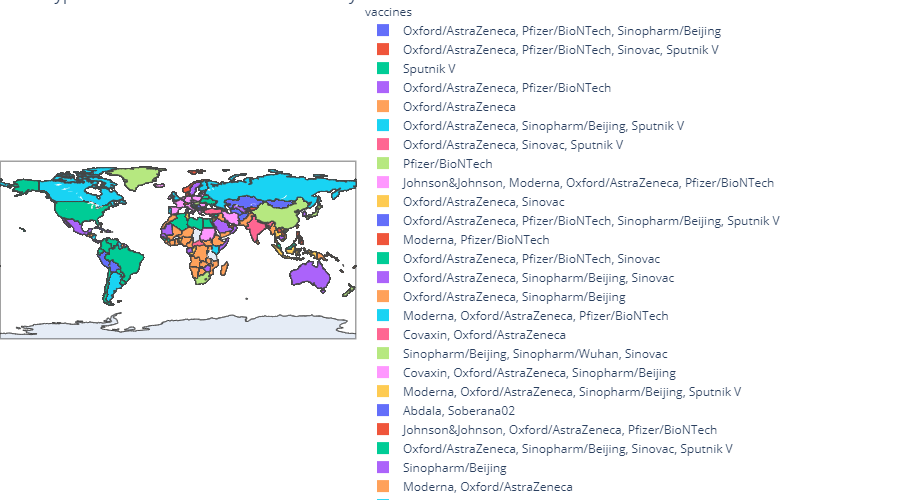

In [16]:
vaccine_map = px.choropleth(data, locations = 'iso_code', color = 'vaccines')
vaccine_map.update_layout(title_text='Types of vaccines taken in each country',height=500, margin={"r":0,"t":0,"l":0,"b":0})
vaccine_map.show()

#### Top 50 countries with highest number of vaccinations

In [35]:
total_vac = data.groupby(['country'])["total_vaccinations"].sum().reset_index()
total_vac=total_vac.nlargest(50, ['total_vaccinations']).reset_index()
del total_vac['index']
top10countries=total_vac['country']
total_vac

,country,total_vaccinations
0,United States,1.620235e+10
1,China,1.347686e+10
2,India,7.713647e+09
3,United Kingdom,3.664407e+09
4,Brazil,2.152959e+09
5,Germany,1.755540e+09
6,Turkey,1.567822e+09
7,France,1.323015e+09
8,Italy,1.258482e+09
9,Israel,1.073424e+09


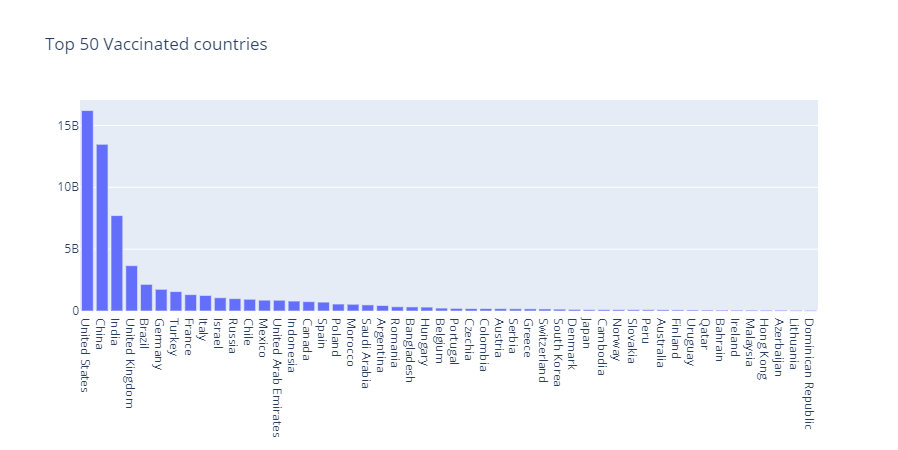

In [37]:
fig = go.Figure(data=[go.Bar( x=total_vac['country'], y=total_vac['total_vaccinations'])])
fig.update_layout(title="Top 50 Vaccinated countries")
fig.show()

#### Daily vaccination done across the World

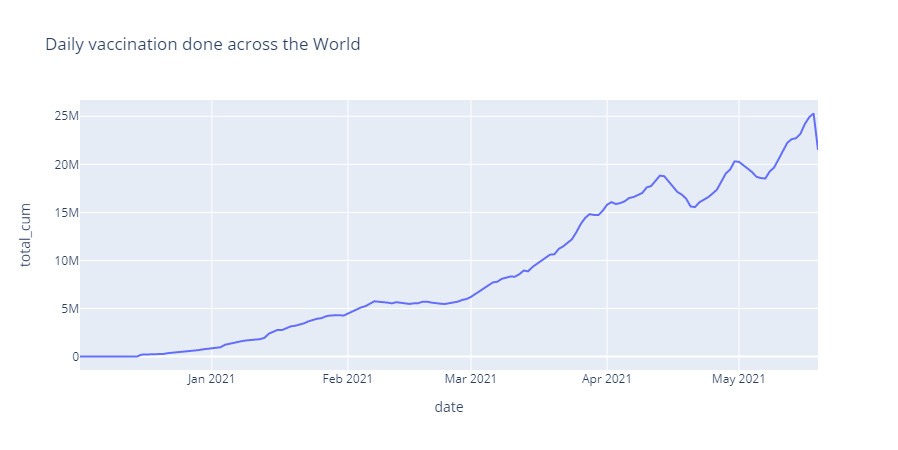

In [28]:
daily_vac=data[['date','daily_vaccinations']].sort_values('date',ascending=True)
daily_vac=daily_vac.groupby(['date'])["daily_vaccinations"].sum().reset_index()
daily_vac['total_cum']=daily_vac.groupby('date')['daily_vaccinations'].cumsum()
fig = px.line(daily_vac, x="date", y="total_cum", title='Daily vaccination done across the World')
fig.show()

#### Total vaccinations available in each country

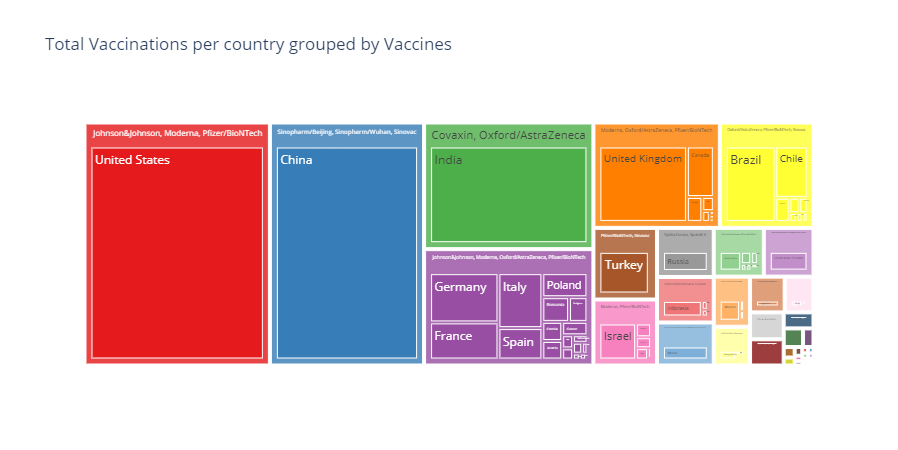

In [29]:
fig = px.treemap(data,names = 'country',values = 'total_vaccinations',path = ['vaccines','country'],
                 title="Total Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set1)
fig.show()

#### Number of people vaccinated in each country

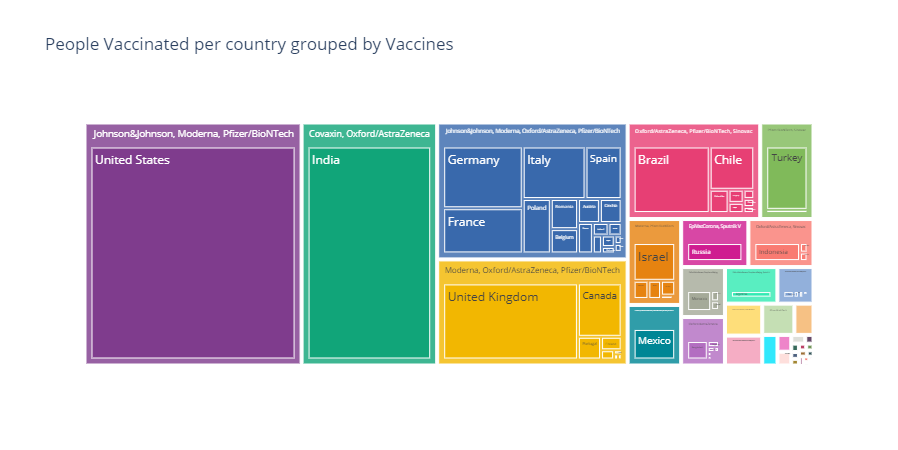

In [30]:
fig = px.treemap(data,names = 'country',values = 'people_vaccinated',path = ['vaccines','country'],
                 title="People Vaccinated per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Bold)
fig.show()